In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

## Note  
This dataset is not cleaned data and has a lot of null values . Data is taken from kaggle

In [214]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [215]:
df.isna().any().sum()

27

In [216]:
df.columns.unique()

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [218]:
df.fillna(df.median(), inplace=True)

C:\Users\Mandar\AppData\Local\Temp\ipykernel_13208\3604797450.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [219]:
df.isna().any().sum()

16

In [220]:
df['Year Built'].unique()

array([1960, 1961, 1958, 1968, 1997, 1998, 2001, 1992, 1995, 1999, 1993,
       1990, 1985, 2003, 1988, 2010, 1951, 1978, 1977, 1974, 2000, 1970,
       1971, 1975, 2009, 2007, 2005, 2004, 2002, 2006, 1996, 1994, 2008,
       1980, 1979, 1984, 1920, 1965, 1967, 1963, 1962, 1976, 1972, 1966,
       1959, 1964, 1950, 1952, 1949, 1940, 1954, 1955, 1957, 1956, 1953,
       1948, 1900, 1910, 1927, 1915, 1945, 1929, 1938, 1923, 1928, 1890,
       1885, 1922, 1925, 1939, 1942, 1936, 1930, 1921, 1912, 1917, 1907,
       1875, 1969, 1947, 1946, 1987, 1941, 1924, 1914, 1931, 1919, 1989,
       1896, 1973, 1991, 1981, 1986, 1916, 1926, 1935, 1892, 1898, 1880,
       1882, 1937, 1902, 1934, 1982, 1983, 1932, 1918, 1904, 1905, 1872,
       1893, 1906, 1908, 1911, 1895, 1879, 1901, 1913], dtype=int64)

# Feature derived 

 Information about price_per_sqft , house_age , Renovation_status

In [221]:
current_year = 2025

df['House_Age'] = current_year - df['Year Built']

df['Price_per_sqft'] = df['SalePrice'] / df['Gr Liv Area']


In [222]:
df['Renovation_status'] = np.where(df['Year Remod/Add'] > df['Year Built'], 'Renovated', 'Not Renovated') 

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,House_Age,Price_per_sqft,Renovation_status
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,0,5,2010,WD,Normal,215000,65,129.830918,Not Renovated
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,0,6,2010,WD,Normal,105000,64,117.187500,Not Renovated
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,Gar2,12500,6,2010,WD,Normal,172000,67,129.420617,Not Renovated
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,0,4,2010,WD,Normal,244000,57,115.639810,Not Renovated
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,0,3,2010,WD,Normal,189900,28,116.574586,Renovated


In [223]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,House_Age,Price_per_sqft
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,...,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,53.643686,121.303619
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,...,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,30.245361,32.090488
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,15.000000,15.371394
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,24.000000,99.871575
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,52.000000,120.230070
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,71.000000,139.885283
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,153.000000,276.250881



Viszulation of Prices by location , Price distribution by house type , Impact of condition on price


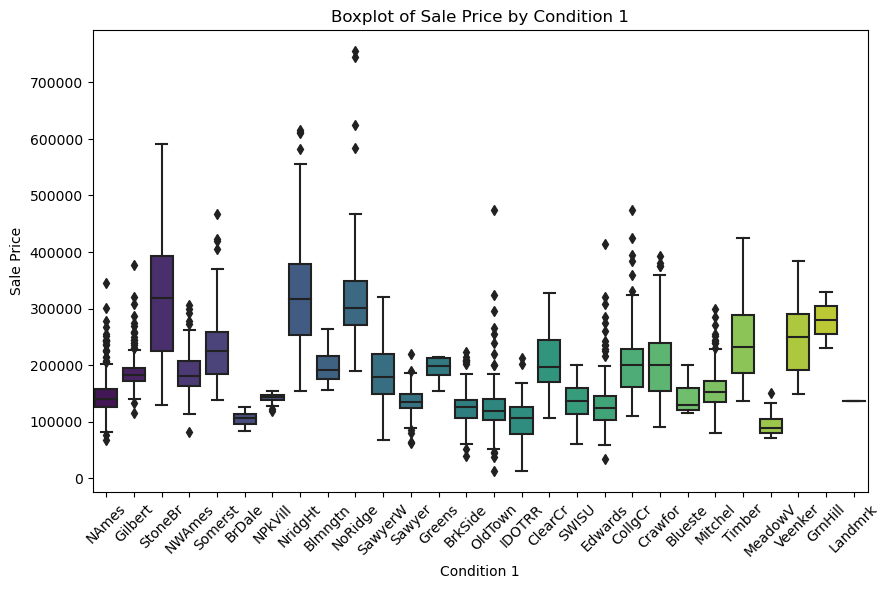

In [ ]:
#  Price by location

plt.figure(figsize=(10, 6))
sns.boxplot(x = df['Neighborhood'], y = df['SalePrice'], palette='viridis')
plt.title('Boxplot of Sale Price by Condition 1')
plt.xlabel('Condition 1')
plt.ylabel('Sale Price')
plt.xticks(rotation=45) 
plt.show()

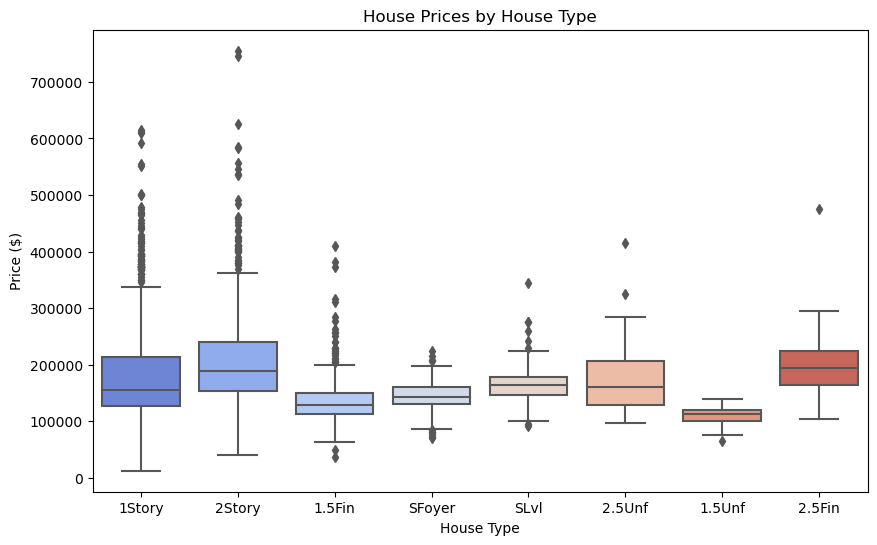

In [ ]:
# Price by House Style
plt.figure(figsize=(10, 6))
sns.boxplot(x = df['House Style'], y = df['SalePrice'], palette='coolwarm')
plt.title("House Prices by House Type")
plt.ylabel("Price ($)")
plt.xlabel("House Type")
plt.show()

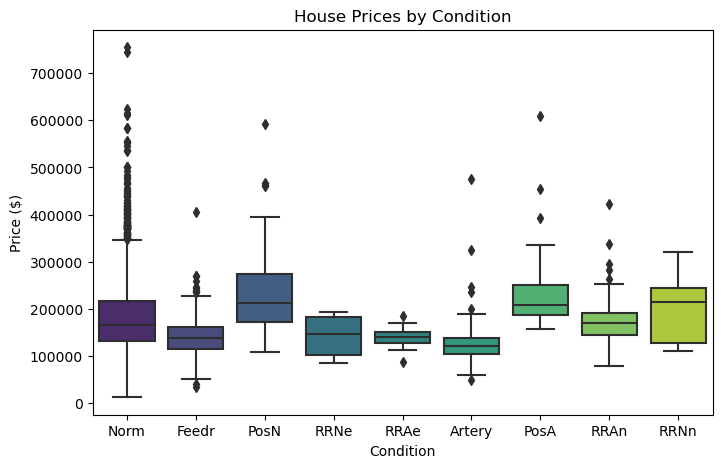

In [ ]:
# Price by Overall Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Condition 1'], y=df['SalePrice'], palette='viridis')
plt.title("House Prices by Condition")
plt.ylabel("Price ($)")
plt.xlabel("Condition")
plt.show()


Creating dataset of avg price

In [227]:
condition_1_price = df.groupby('Condition 1')['SalePrice'].mean().reset_index()
house_style_price =df.groupby('House Style')['SalePrice'].mean().reset_index()
neighborhood_price = df.groupby('Neighborhood')['SalePrice'].mean().reset_index()

print("\n avr sale price by condition 1: \n", condition_1_price)
print("\n avr sale price by house style: \n", house_style_price)
print("\n avr sale price by neighborhood: \n", neighborhood_price)




 avr sale price by condition 1: 
   Condition 1      SalePrice
0      Artery  129229.891304
1       Feedr  142605.615854
2        Norm  184050.511102
3        PosA  253917.500000
4        PosN  245720.410256
5        RRAe  138710.714286
6        RRAn  181413.000000
7        RRNe  142558.333333
8        RRNn  201027.777778

 avr sale price by house style: 
   House Style      SalePrice
0      1.5Fin  137529.923567
1      1.5Unf  109663.157895
2      1Story  178699.875084
3      2.5Fin  220000.000000
4      2.5Unf  177158.333333
5      2Story  206990.159221
6      SFoyer  143472.662651
7        SLvl  165527.382812

 avr sale price by neighborhood: 
    Neighborhood      SalePrice
0       Blmngtn  196661.678571
1       Blueste  143590.000000
2        BrDale  105608.333333
3       BrkSide  124756.250000
4       ClearCr  208662.090909
5       CollgCr  201803.434457
6       Crawfor  207550.834951
7       Edwards  130843.381443
8       Gilbert  190646.575758
9        Greens  193531.250000
10

Total Bathrooms / Bedroom price

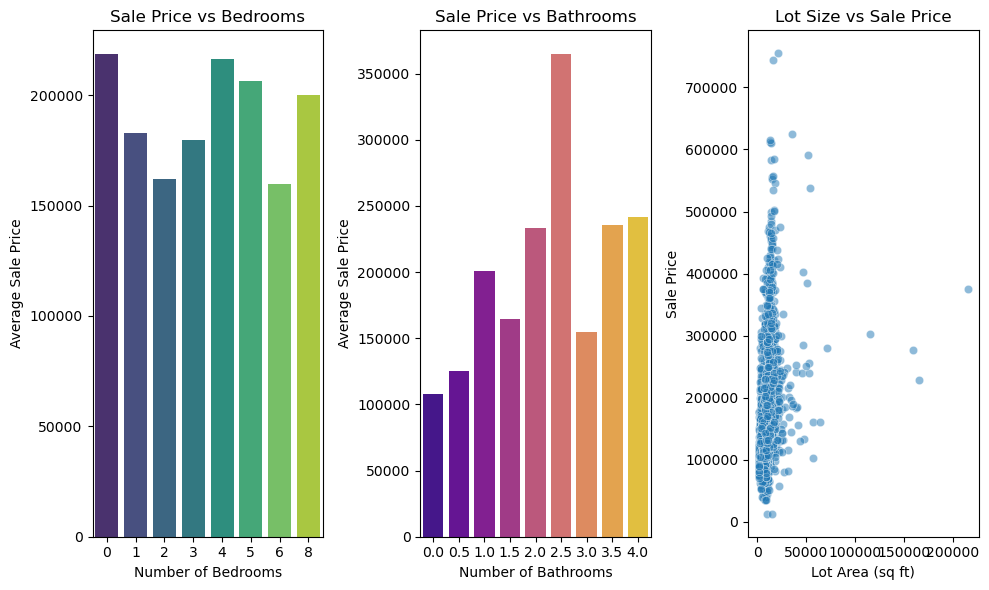

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,House_Age,Price_per_sqft,Renovation_status,Total Bathrooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,5,2010,WD,Normal,215000,65,129.830918,Not Renovated,0.5
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,6,2010,WD,Normal,105000,64,117.187500,Not Renovated,0.5
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,12500,6,2010,WD,Normal,172000,67,129.420617,Not Renovated,1.5
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,4,2010,WD,Normal,244000,57,115.639810,Not Renovated,2.0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,3,2010,WD,Normal,189900,28,116.574586,Renovated,2.0


In [228]:
df['Total Bathrooms'] = df['Full Bath'] * 0.5 + df['Half Bath']



bathroom_price = df.groupby('Total Bathrooms')['SalePrice'].mean().reset_index()
bedroom_price = df.groupby('Bedroom AbvGr')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Bedroom AbvGr', y='SalePrice', data=bedroom_price, palette='viridis')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Sale Price")
plt.title("Sale Price vs Bedrooms")

# Plot 2: SalePrice by Number of Bathrooms
plt.subplot(1, 3, 2)
sns.barplot(x='Total Bathrooms', y='SalePrice', data=bathroom_price, palette='plasma')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Sale Price")
plt.title("Sale Price vs Bathrooms")

# Plot 3: Lot Size vs Sale Price (Scatter Plot)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Lot Area', y='SalePrice', data=df, alpha=0.5)
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Lot Size vs Sale Price")

plt.tight_layout()
plt.show()

df.head()

In [229]:
df.groupby('Total Bathrooms')['SalePrice'].max()

Total Bathrooms
0.0    145000
0.5    308030
1.0    555000
1.5    615000
2.0    611657
2.5    755000
3.0    200000
3.5    235876
4.0    269500
Name: SalePrice, dtype: int64